In [123]:
import seaborn as sns
from sklearn.cluster import KMeans
from agent.ContinuousAgent import CartPoleAgentCont
from util.Agent import select_agent
from continuous import trainAgent
import pickle


resultsFolder = 'results/continuous/tests/'
agent = CartPoleAgentCont()
teacherAgent, number, teacherPath = select_agent(agent, resultsFolder, 10)
print('Using agent:', number, teacherPath)


with open(resultsFolder + 'agentRL3.npy_gmodelstate', "rb") as f:
    states = pickle.load(f)

teacherAgent.generalise_model = KMeans(n_clusters=6561, n_init=10)
teacherAgent.generalise_model.fit(states)

teacherAgent.save(resultsFolder + 'agentRL0.npy')

# label = teacherAgent.generalise_model.predict(states)
# df = {}
# df['A'] = [x[0] for x in states]
# df['B'] = [x[1] for x in states]
# df['cluster'] = label
# dic = {0:"Blue", 1:"Red", 2:"Green", 3:"Yellow"}
# sns.scatterplot(x="A", y="B", data=df, hue="cluster", palette = dic)



['results/continuous/tests/agentRL0.npy', 'results/continuous/tests/agentRL1.npy', 'results/continuous/tests/agentRL2.npy', 'results/continuous/tests/agentRL3.npy', 'results/continuous/tests/agentRL4.npy', 'results/continuous/tests/agentRL5.npy', 'results/continuous/tests/agentRL6.npy', 'results/continuous/tests/agentRL7.npy', 'results/continuous/tests/agentRL8.npy', 'results/continuous/tests/agentRL9.npy']
Using agent: 0 results/continuous/tests/agentRL0.npy


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
resultsFolder = 'results/continuous/tests/'
def get_value(filename, pro = None, acc = None, r= 0) :
    data = []
    for i in range(2,3):
        fname = resultsFolder + filename + '_' + str(pro) + '_' + str(acc) + '_True' + str(r) + '.csv'
        rw = pd.read_csv(fname).iloc[:,1] # read column 1
        rw_refined = get_avg(rw)
        data.append(rw_refined)
    merged = pd.concat(data,axis=1)

    means = merged.mean(axis=1)
    return means
def get_avg(data):

    #get avg last 200 reward 
    num_loop = 200
    rewards = data.tolist()
    avg_reward = [0.] * (len(rewards) - num_loop)
    r_count = 0.
    for i in range(len(rewards)):
        r_count += rewards[i]
        # if(i < 100): 
        #     avg_reward[i] = r_count/(i + 1)
        # else:
        if(i >= num_loop): 
            r_count -= rewards[i-num_loop]
            avg_reward[i - num_loop] = r_count/num_loop
            
    return pd.Series(avg_reward)

In [134]:
import math
def plotRewards(filename):


      plt.rc('xtick', labelsize=12)
      plt.rc('ytick', labelsize=12)

      plt.figure('Collected reward')
      plt.suptitle('Collected reward')

      for i in range(8, 12):
            num_cluster = int(math.pow(i, 4))
            data = get_value("rewardsIRL0", 0.47316, 0.9487, num_cluster)
            plt.plot(data, label = 'Average reward IRL' + str(num_cluster), linestyle = '--' )
      # labels = [
      #       'Average reward IRL3', 
      #       'Average reward IRL9',
      #       'Average reward IRL27',
      #       'Average reward IRL81',
      #       'Average reward IRL273',
      #       'Average reward IRL819',
      #       'Average reward IRL2457',
      #       'Average reward IRL7371',
      #       'Average reward IRL22113'
      #       ]

      # plt.plot(IRL3, label = labels[0], linestyle = '--', color = 'y' )
      # plt.plot(IRL9, label = labels[1], linestyle = '--', color =  'r')
      # plt.plot(IRL27, label = labels[2], linestyle = '--', color =  'g')
      # plt.plot(IRL81, label = labels[3], linestyle = '--', color =  'b')
      # plt.plot(IRL273, label = labels[4], linestyle = '--')
      # plt.plot(IRL819, label = labels[5], linestyle = '--')
      # plt.plot(IRL2457, label = labels[6], linestyle = '--')
      # plt.plot(IRL7371, label = labels[7], linestyle = '--')
      # plt.plot(IRL22113, label = labels[8], linestyle = '--')

      handles, labels_ = plt.gca().get_legend_handles_labels()

      # handles = [handles[0], handles[2], handles[1]]
      # labels = [labels[0], labels[2], labels[1]]

      plt.legend(handles,labels_,loc=4,prop={'size':8}, bbox_to_anchor=(1.5, -0.3),
            fancybox=True, shadow=True, ncol=5)

      # plt.legend(loc=4,prop={'size':8}, bbox_to_anchor=(1.5, -0.3),
      #       fancybox=True, shadow=True, ncol=5)
      plt.xlabel('Episodes')
      plt.ylabel('Avg Reward')

      plt.savefig(resultsFolder + filename + '.png')

      plt.show()

In [103]:
IRL3 = get_value("rewardsIRL0", 0.47316, 0.9487, 3)
IRL9 = get_value("rewardsIRL0", 0.47316, 0.9487, 9)
IRL27 = get_value("rewardsIRL0", 0.47316, 0.9487, 27)
IRL81 = get_value("rewardsIRL0", 0.47316, 0.9487, 81)
IRL273 = get_value("rewardsIRL0", 0.47316, 0.9487, 273)
IRL819 = get_value("rewardsIRL0", 0.47316, 0.9487, 819)
IRL2457 = get_value("rewardsIRL0", 0.47316, 0.9487, 2457)
IRL7371 = get_value("rewardsIRL0", 0.47316, 0.9487, 7371)
IRL22113 = get_value("rewardsIRL0", 0.47316, 0.9487, 22113)

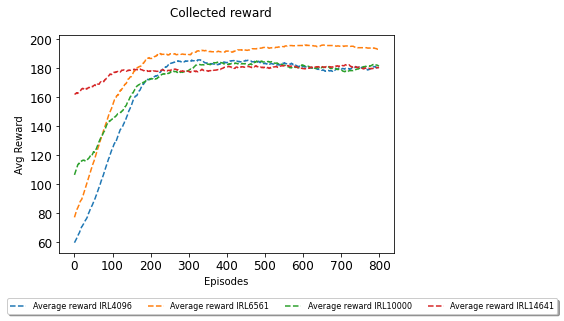

In [135]:
plotRewards("rewards")